In [4]:
# Kết nối Google Colab vào Google Drive
from google.colab import drive
drive.mount("/content/drive")
# Chuyển đến thư mục làm việc
%cd /content/drive/MyDrive/Lecture_CNTT_2020/Bai giang AI 2020/Bai giang cho giao vien/AI.Code

Mounted at /content/drive
/content/drive/MyDrive/Lecture_CNTT_2020/Bai giang AI 2020/Bai giang cho giao vien/AI.Code


In [5]:
!ls

 2320_ThiChung.xlsx		'Lab 2.pdf'
 advertising.csv		 LG_kiemtra.ipynb
 Alpha_beta.py			 Logistic_kiemtra.ipynb
'A One Sample.ipynb'		 mini_batch_gradient_descent.ipynb
'A One Sample.py'		 mini_batch_gradient_descent.py
 bath_gradient_descent.ipynb	 Mucnuoc.ipynb
 bath_gradient_descent.py	 Mucnuoc.py
'B One Sample.py'		 NLP_Demo
'C m Samples.ipynb'		 nn.py
'C m Samples.py'		 Peceptron.py
'Code Game.gform'		 Perceptron.ipynb
'Code Game (Responses).gsheet'	 pla_vis.gif
'Copy of advertising.csv'	'Search in Pacman.gslides'
 Countries-exercise.csv		 search.zip
 data.csv			 Simple_Kmean_CSV.ipynb
 data_lr.csv			 Simple_Kmean.ipynb
'DD Sample Vectorization.py'	'Single Layer Perceptron Dataset 2.csv'
'D sample Vectorization.py'	 stochastic_gradient_descent.py
'F N Samples Vectorization.py'	 Tic.ipynb
 GDwithMomentum.py		 TicTacToe.py
 Kmean_HowTo.ipynb		 TicTocToeAlpha_Beta.py


In [7]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
# get data
data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

X = data[:, 0:3]
y = data[:, 3:4]

N = data.shape[0]

# normalize data
maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)


# get X bar [1,X]
X_b = np.c_[np.ones((N, 1)), X]

print(X_b)

[[ 1.00000000e+00  5.50426788e-01 -9.83586370e-02  7.57928475e-03]
 [ 1.00000000e+00 -7.57540486e-02 -9.32979082e-02 -7.37297571e-02]
 [ 1.00000000e+00 -1.67859312e-01 -7.10307018e-02  7.91666667e-03]
 [ 1.00000000e+00  2.85244602e-01 -8.65502699e-02 -2.85205803e-02]
 [ 1.00000000e+00  3.84097503e-01 -1.89451754e-01 -2.88579622e-02]
 [ 1.00000000e+00 -1.96536775e-01 -6.09092443e-02  2.71474359e-02]
 [ 1.00000000e+00 -3.18943995e-02 -1.15227733e-01 -1.46604251e-01]
 [ 1.00000000e+00  1.79644062e-01 -1.59762146e-01 -1.86752699e-01]
 [ 1.00000000e+00 -1.96874157e-01 -2.18803981e-01 -2.22515182e-01]
 [ 1.00000000e+00  4.48200067e-01 -2.17117072e-01 -1.54364035e-01]
 [ 1.00000000e+00 -2.87955466e-03 -2.06320850e-01 -1.44242578e-01]
 [ 1.00000000e+00  4.98469973e-01 -1.44917341e-01 -2.12393725e-01]
 [ 1.00000000e+00 -1.45592105e-01 -1.07467949e-01 -3.55431849e-03]
 [ 1.00000000e+00  1.03058367e-01 -2.00247976e-01 -2.01597503e-01]
 [ 1.00000000e+00  4.62707490e-01 -1.14890351e-01 -7.06933198e

In [ ]:

def batch_gradient_descent():
    epochs_max = 100
    learning_rate = 0.01

    # init theta
    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []

    for i in range(epochs_max):
        # predict y_hat
        y_hat = X_b.dot(thetas)

        # compute loss
        loss = (y_hat - y) ** 2

        # compute gradient for loss
        d_loss = 2 * (y_hat - y) / N

        # compute gradient for params
        gradients = X_b.T.dot(d_loss)

        # update
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas)

        mean_loss = np.sum(loss) / N
        losses.append(mean_loss)

    return thetas_path, losses


[[11.92116614]
 [ 5.70730029]
 [-1.02560493]
 [-0.87381106]]


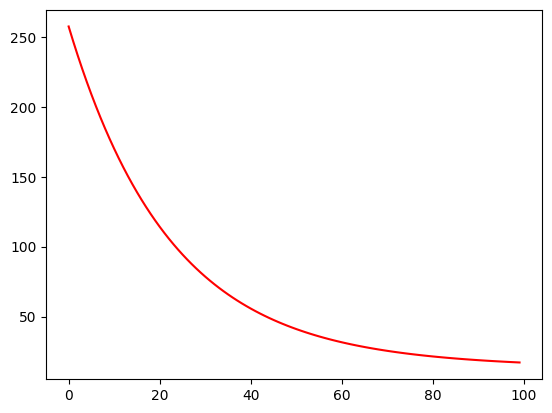

In [ ]:
bgd_thetas, losses = batch_gradient_descent()

print(bgd_thetas[-1])

# in loss cho 100 sample đầu
x_axis = list(range(100))
plt.plot(x_axis, losses[:100], color="r")
plt.show()